In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

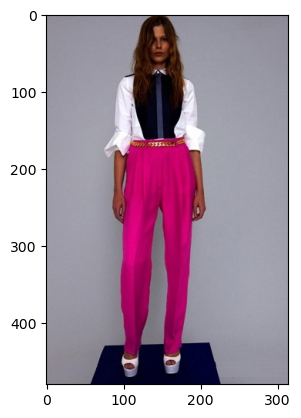

In [2]:
image = cv.imread('images/tshirt.jpg')
scale_percent = 20
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
#resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

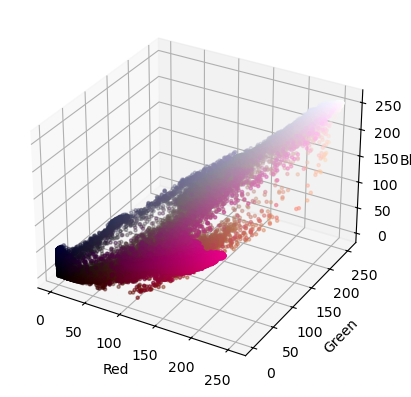

In [3]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [4]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

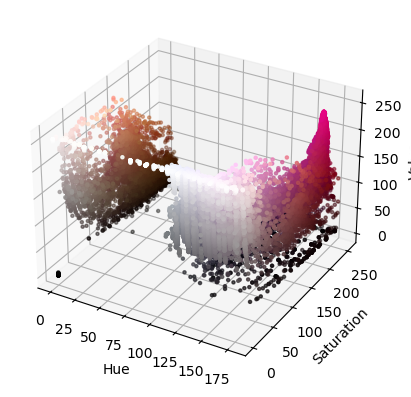

In [5]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [6]:
def segmentate(l_h, l_s, l_v, h_h, h_s, h_v):    
    lower_yellow = np.array([l_h,l_s,l_v])
    upper_yellow = np.array([h_h,h_s,h_v])
    lo_square = np.full((10, 10, 3), lower_yellow, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), upper_yellow, dtype=np.uint8) / 255.0

    # plt.subplot(1, 2, 1)
    # plt.imshow(hsv_to_rgb(lo_square))
    # plt.subplot(1, 2, 2)
    # plt.imshow(hsv_to_rgb(do_square))
    # plt.show()
    mask = cv.inRange(image_hsv, lower_yellow, upper_yellow)

    # res = cv.dilate(mask, kernel, iterations=2)

    result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))

    plt.figure(figsize=(15,20))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()

In [8]:
interact(segmentate, l_h=54, l_s=141, l_v=68, h_h=167, h_s=402, h_v=300)

interactive(children=(IntSlider(value=54, description='l_h', max=162, min=-54), IntSlider(value=141, descripti…

<function __main__.segmentate(l_h, l_s, l_v, h_h, h_s, h_v)>

Были подобраны следующие оптимальные значения:

low_yellow - [16, 0, 240]
high_yellow - [25, 255, 255]